In [1]:
from imageai.Detection import ObjectDetection
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img
import os
from matplotlib import pyplot as plt

Using TensorFlow backend.


([{'name': 'car', 'percentage_probability': 89.569616317749023, 'box_points': (178, 29, 434, 98)}, {'name': 'car', 'percentage_probability': 97.157180309295654, 'box_points': (87, 73, 491, 312)}, {'name': 'car', 'percentage_probability': 97.824609279632568, 'box_points': (393, 78, 600, 254)}], ['/home/jovyan/work/car_identification/image2new.jpg-objects/car-1.jpg', '/home/jovyan/work/car_identification/image2new.jpg-objects/car-2.jpg', '/home/jovyan/work/car_identification/image2new.jpg-objects/car-3.jpg'])
{'name': 'car', 'percentage_probability': 97.157180309295654, 'box_points': (87, 73, 491, 312)}
(600, 399)


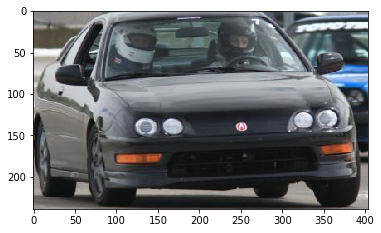

In [3]:
execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join(execution_path , "./modules/yolo.h5"))
detector.loadModel()
custom_objects = detector.CustomObjects(car=True)

detections = detector.detectCustomObjectsFromImage(
    custom_objects=custom_objects,
    input_image=os.path.join(execution_path , "./stanford-car-dataset-by-classes-folder/car_data/Acura Integra_Type_R Coupe 2001/00898.jpg"), 
    minimum_percentage_probability=30,
    output_image_path=os.path.join(execution_path , "image2new.jpg"),
    extract_detected_objects=True
)

print(detections)
print(detections[0][1])

img = load_img('./stanford-car-dataset-by-classes-folder/car_data/Acura Integra_Type_R Coupe 2001/00898.jpg')
print(img.size)
w,h = img.size

crop_img = img.crop(list(map(lambda x: int(x) , detections[0][1]['box_points'])))
plt.imshow(crop_img)